# Visualizing probability distributions


References: 

1. [Deep Learning Book](https://www.deeplearningbook.org/)
2. https://medium.com/@tubelwj/eight-probability-distribution-and-visualization-implemented-by-python-e4f304a3eafe
3. https://www.educative.io/answers/how-to-model-the-bernoulli-distribution-in-python

## Libraries

In [26]:
import scipy.stats as stats
from scipy.stats import bernoulli, poisson
import matplotlib.pyplot as plt
import numpy as np

## Bernoulli Distribution

The Bernoulli distribution is a distribution over a single binary random variable. It is controlled by a single parameter $\phi \in [0,1]$, which gives the probability of the random variable bein equal to 1. It has the following properties: 

$$P(X = 1) = \phi$$
$$P(X = 0) = 1 - \phi$$
$$P(X = x) = \phi^x(1 - \phi)^{1 - x}$$
$$E[X] = \phi$$
$$Var(X) = \phi(1 - \phi)$$

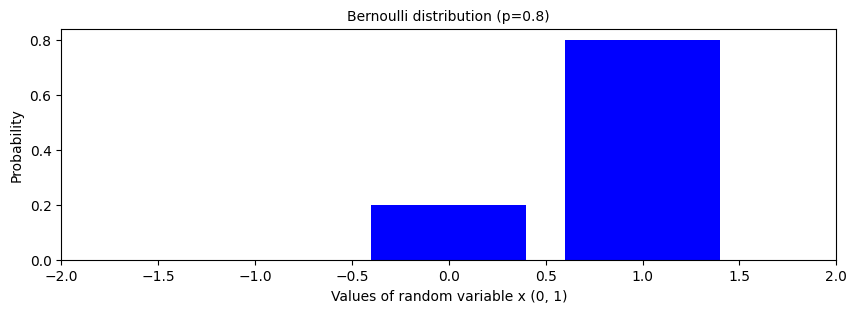

In [18]:
# Instance of Bernoulli distribution with parameter p = 0.8
bd=bernoulli(0.8)

# Outcome of random variable either 0 or 1
x=[0, 1]

# For the visualization of the bar plot of Bernoulli's distribution
plt.figure(figsize=(10,3))
plt.xlim(-2, 2)
plt.bar(x, bd.pmf(x), color='blue')

# For labelling of Bar plot
plt.title('Bernoulli distribution (p=0.8)', fontsize='10')
plt.xlabel('Values of random variable x (0, 1)', fontsize='10')
plt.ylabel('Probability', fontsize='10')

plt.show()

## Gaussian Distribution

The most commonly used distribution over real numbers is the **normal distribution**, also known as the **Gaussian distribution**:

$$\mathcal{N}(x; \mu, \sigma^2) = \sqrt{\frac{1}{2\pi\sigma^2}}exp\biggr(-\frac{1}{2\sigma^2}(x - \mu)^2\biggr)$$

The normal distribution is a good default choice for two major reasons:

1. Many distributions we wish to model are truly close to being normal distributions
2. Out of all possible probability distributions with the same variance, the normal distribution encodes the **maximum** amount of uncertainty over the real numbers

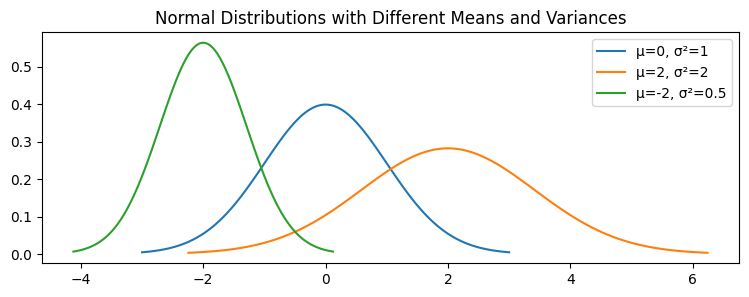

In [13]:
# Define parameters
means = [0, 2, -2]
variances = [1, 2, 0.5]

# Set up the figure
plt.figure(figsize=(9, 3))

# Plot each distribution
for mu, variance in zip(means, variances):
    sigma = np.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label=f'μ={mu}, σ²={variance}')

# Add title and legend
plt.title("Normal Distributions with Different Means and Variances")
plt.legend()
plt.show()

## Poisson Distribution

> If an event occurs at a fixed rate over time, the probability of observing a certain number of events (n) can be described using the Poisson distribution. 

Given by:

$$f(\lambda, k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

Let's calculate the probability of $f(k = 9)$ with $\lambda = 3$:

In [22]:
print("Result: ", stats.poisson.pmf(k=9, mu=3)) 

Result:  0.002700503931560479


This following code line generates *600* random variables (size=600) from a Poisson distribution with a mean $\lambda$ of 3. The `stats.poisson.rvs` function is used to generate these random variables.

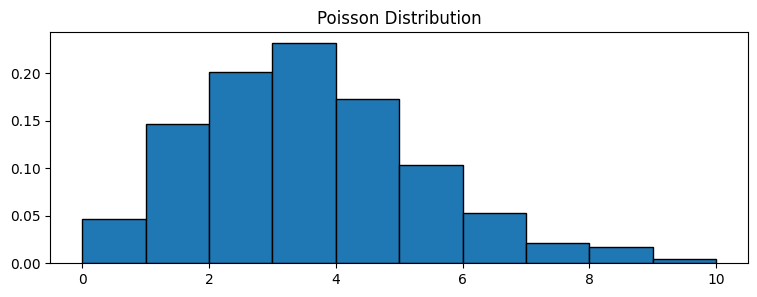

In [29]:
# Generate random variables following a Poisson distribution
X = stats.poisson.rvs(mu=3, size=600)

# Set up the figure with a specific size
plt.subplots(figsize=(9, 3))

# Plot a histogram of the generated data
plt.hist(X, density=True, edgecolor="black")

# Add a title to the plot
plt.title("Poisson Distribution")

# Display the plot
plt.show()

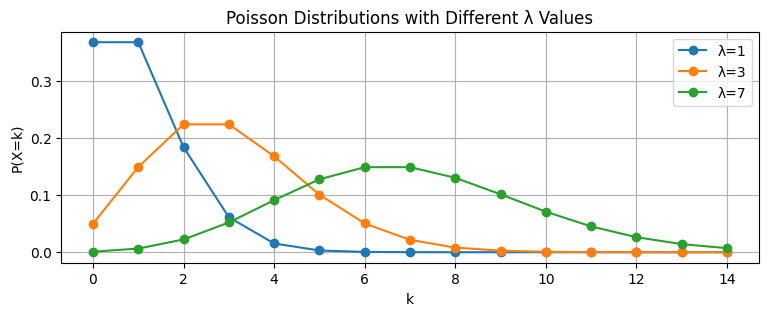

In [30]:
# Define the lambda parameter
lambda_param = 5

# Define the range of k values
k_values = np.arange(0, 15)

# Set up the figure
plt.figure(figsize=(9, 3))

# Plot Poisson distributions for different k values
for lambda_param in [1, 3, 7]:
    plt.plot(k_values, poisson.pmf(k_values, lambda_param), marker='o', linestyle='-', label=f'λ={lambda_param}')

# Add title and legend
plt.title("Poisson Distributions with Different λ Values")
plt.xlabel('k')
plt.ylabel('P(X=k)')
plt.legend()
plt.grid(True)
plt.show()

## Exponential Distribution

The probability density function (PDF) of the exponential distribution is given by the following equation:

$$ f(x; \lambda) = 
\begin{cases} 
\lambda e^{-\lambda x} & \text{for } x \ge 0, \\
0 & \text{for } x < 0
\end{cases}
$$

where $\lambda > 0$ is the rate parameter of the distribution.

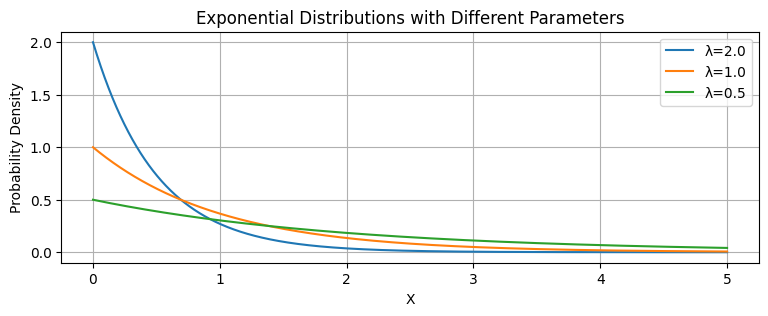

In [31]:
# Define the range of X values
X = np.linspace(0, 5, 6000)

# Set up the figure
plt.subplots(figsize=(9, 3))

# Plot exponential distributions for different scale parameters (λ)
for scale in [0.5, 1, 2]:
    exponential_distribution = stats.expon.pdf(X, loc=0, scale=scale)
    plt.plot(X, exponential_distribution, label=f'λ={1/scale}')

# Add title and legend
plt.title("Exponential Distributions with Different Parameters")
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()